In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , accuracy_score
import seaborn as sns
import warnings

In [17]:
warnings.filterwarnings("ignore")

In [19]:
df  = pd.read_csv("winequality-red.csv")

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [21]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64>

In [9]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [27]:
X = df.drop(columns = ['quality'])
y = df.quality

In [37]:
sc = StandardScaler()
X_tanformed = sc.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_tanformed,y, test_size = 0.2,  random_state = 10)

In [45]:
k = 3
knn = KNeighborsClassifier(n_neighbors = k)

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
y_predic = knn.predict(X_test)
y_predic

array([6, 5, 5, 6, 5, 7, 7, 7, 6, 5, 7, 3, 5, 5, 6, 6, 5, 6, 6, 5, 3, 6,
       5, 4, 4, 6, 5, 6, 6, 4, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 7, 6, 6, 6,
       5, 7, 6, 5, 6, 6, 5, 7, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 7, 5, 5, 6,
       6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 7, 6, 5, 6, 5, 6, 5, 5, 5,
       6, 6, 8, 5, 7, 4, 5, 6, 4, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 7, 6,
       5, 6, 6, 5, 6, 5, 4, 5, 6, 6, 5, 5, 6, 6, 6, 4, 5, 6, 5, 4, 6, 5,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 6,
       6, 6, 5, 5, 7, 6, 5, 5, 6, 5, 5, 6, 7, 7, 6, 5, 5, 5, 5, 6, 6, 3,
       7, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 7, 5, 5, 5, 6, 6, 7, 6, 6, 5, 5,
       7, 6, 6, 7, 5, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5,
       5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 4, 6, 5, 6, 5, 3, 5, 5, 5, 6,
       4, 6, 6, 6, 5, 5, 5, 7, 5, 6, 5, 5, 6, 5, 7, 7, 7, 6, 5, 5, 6, 6,
       5, 5, 4, 7, 6, 6, 5, 7, 6, 5, 4, 5, 5, 6, 6, 6, 8, 6, 6, 7, 6, 6,
       6, 5, 5, 6, 6, 5, 8, 6, 5, 7, 4, 6, 5, 6, 6,

In [51]:
print(y_test)

1518    5
1246    5
544     6
1343    6
428     5
       ..
821     7
1086    7
805     7
678     5
298     5
Name: quality, Length: 320, dtype: int64


In [63]:
confu_matrix = confusion_matrix(y_test,y_predic)
confu_matrix

array([[ 0,  0,  1,  1,  0,  0],
       [ 1,  0,  3,  5,  0,  0],
       [ 3,  6, 84, 36,  3,  0],
       [ 0,  7, 38, 68, 12,  2],
       [ 0,  0,  9, 12, 20,  1],
       [ 0,  0,  2,  4,  2,  0]], dtype=int64)

In [67]:
accuracy = accuracy_score(y_test,y_predic)
accuracy

0.5375

In [75]:
knn.predict([[8 ,0.6 ,0.55 ,2 ,0.099 ,15 ,65 ,0.99,4,0.6,10]])

array([7], dtype=int64)

<Axes: >

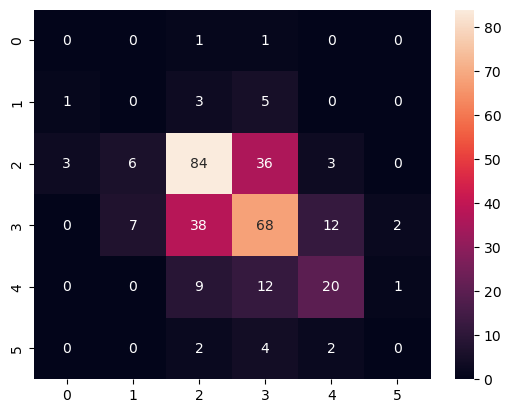

In [87]:
sns.heatmap(confu_matrix, annot = True, fmt="d")